# Practical Linear Algebra for Data Science

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc

rc("animation", html="jshtml")


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io, color

# convolution
from scipy.signal import convolve2d
from scipy.linalg import hilbert

import scipy


import pandas as pd
import sympy as sym


# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats(
    "svg"
)  # display figures in vector format
plt.rcParams.update({"font.size": 14})  # set global font size

###### ============================
# Chapter 10
## Row Reduction and LU Decomposition


### Sys of Equations

$Ax=b$: $A$ is matrix of coefficients, $x$ is vector of variables, $b$ is the constants


### Techniques for solving sys of equations
#### Row Reduction

It involves transforming a matrix into an upper-triangular matrix via row manipulations (scalar mult and addition), which can be implemented as a premultiplication by a transformation matrix. Then the matrix is in echelon form. Echelon form is not unique.

#### Gaussian Elimination

Similar to row reduction, but in this case, we augment $A$ with $b$ i.e., $[A,b]$, then we do the row reduction on this matrix. Then by using back substituation we solve the equation.

#### Gaussian Elimination (Reduced Row Echelon Form, RREF)
The first nonzero element in each row is called the <i>pivot</i>.

RREF is unique. To create RREF, we continue from Gaussian elimination, and we make the pivot of each row 1, by diving that row by it's value. If we continue upward elimination and make every element above each pivot zero, the we get RREF.

- $rref([A|I]) \implies [I|A^{-1}]$, so if we augment a matrix A by I, and take the rref, we obtain the inverse of the A without caclulating determinants.


In [2]:
import sympy as sym

M = np.random.randn(2, 3)

symMat = sym.Matrix(M)

RREF = symMat.rref()[0]


print(f"Original Matrix:\n{M}\n")
print(f"RREF:\n{np.array(RREF)}\n")

Original Matrix:
[[ 1.01863217 -0.6730352  -0.83583408]
 [-2.0469829   0.5475889   1.54422412]]

RREF:
[[1 0 -0.709383843665253]
 [0 1 0.168242127292796]]



In [3]:
# $rref([A|I]) \implies [I|A^{-1}]$
M = np.random.randn(3, 3)
print(f"Original Matrix:\n{M}\n")

M_aug = np.hstack((M, np.eye(M.shape[0])))

symMat = sym.Matrix(M_aug)

RREF = symMat.rref()[0]

print(f"RREF:\n{np.array(RREF)}\n")
print(f"M^-1:\n{np.linalg.pinv(M)}")

Original Matrix:
[[-0.13700572 -1.18001389 -1.19939737]
 [-0.30350718  0.48245677 -0.31464413]
 [-0.80475654  0.30525586  0.14339641]]

RREF:
[[1 0 0 -0.227168136287175 0.270729030313566 -1.30604079334393]
 [0 1 0 -0.407968560801104 1.35406090869618 -0.441218141506106]
 [0 0 1 -0.406427518721632 -1.36310295290279 0.583275074601194]]

M^-1:
[[-0.22716814  0.27072903 -1.30604079]
 [-0.40796856  1.35406091 -0.44121814]
 [-0.40642752 -1.36310295  0.58327507]]


### LU Decomposition (Lower-Upper)

Decomposes the matrix into two triangular matrices of lower {L} and upper {U} form $A=LU$
The function is scipy library, <u>scipy.linalg.lu(A)</u> calculates LU decomposition

So basically $L^{-1}$ is the transformation that changes $A$ to an upper-triangular echelon of $U$ ($L^{-1}A=U$).

The scipy lu command returns three variable, $P$, $L$, and $U$. $P$ is the perumutation matrix and it is orthogonal and it swaps the row orders to create L and U. $$A=PLU \implies P^TA=LU$$

- U has the rank of the original Matrix
- The diagonal values of L are all 1s.
- $det(A)=det(PLU)=det(P)det(L)det(U)$. For a triangular matrix, the determinant is product of the diagonal values. det(L)=1 because of the above note. The determinant of P is 1 for even number of rows of P and -1 for odd numbers.

In [4]:
A = np.random.randn(4, 4)

# a matrix
# A = np.array([ [2,2,4], [1,0,3], [2,1,2] ])

# its LU decomposition via scipy (please ignore the first output for now)
P, L, U = scipy.linalg.lu(A)

# print them out
print("L: ")
print(np.round(L, 2)), print(" ")

print("U: ")
print(np.round(U, 2)), print(" ")

print("A - PLU: ")
print(np.round(A - P @ L @ U, 2))  # should be zeros

L: 
[[ 1.    0.    0.    0.  ]
 [-0.81  1.    0.    0.  ]
 [-0.59 -0.87  1.    0.  ]
 [ 0.49 -0.53  0.36  1.  ]]
 
U: 
[[-1.62 -0.11  1.91  2.34]
 [ 0.    0.47  2.91  2.18]
 [ 0.    0.    3.6   4.87]
 [ 0.    0.    0.   -1.93]]
 
A - PLU: 
[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0. -0.  0.]
 [ 0.  0.  0.  0.]]


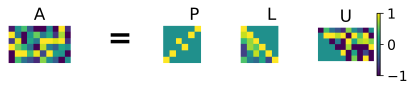

In [5]:
# matrix sizes
m = 6
n = 10

A = np.random.randn(m, n)

P, L, U = scipy.linalg.lu(A)

# show the matrices
fig, axs = plt.subplots(1, 5, figsize=(6, 3))

axs[0].imshow(A, vmin=-1, vmax=1)
axs[0].set_title("A")

axs[1].imshow(np.ones((m, n)), cmap="gray", vmin=-1, vmax=1)
axs[1].text(n / 2, m / 2, "=", ha="center", fontsize=30, fontweight="bold")
# axs[1].axis('off')

axs[2].imshow(P.T, vmin=-1, vmax=1)
axs[2].set_title(r"P")

axs[3].imshow(L, vmin=-1, vmax=1)
axs[3].set_title("L")

h = axs[4].imshow(U, vmin=-1, vmax=1)
axs[4].set_title("U")

for a in axs:
    a.axis("off")
    a.set_xlim([-0.5, n - 0.5])
    a.set_ylim([m - 0.5, -0.5])


fig.colorbar(h, ax=axs[-1], fraction=0.05)
plt.tight_layout()
plt.show()

In [6]:
##### exer 1
import time

# start the timer
tic = time.time()

# run the test
for i in range(1000):
    A = np.random.randn(100, 100)
    P, L, U = scipy.linalg.lu(A)

# stop the timer
toc = time.time() - tic
toc  # print the result in seconds

0.3919239044189453

Text(0.5, 1.0, 'U rank=3')

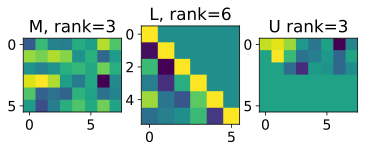

In [7]:
M = 6
N = 8
r = 3

A = np.random.randn(M, r)
B = np.random.randn(r, N)

M = A @ B

P, L, U = scipy.linalg.lu(M)

fig, axs = plt.subplots(1, 3, figsize=(6, 2))
axs[0].imshow(M)
axs[0].set_title(f"M, rank={np.linalg.matrix_rank(M)}")

axs[1].imshow(L)
axs[1].set_title(f"L, rank={np.linalg.matrix_rank(L)}")

axs[2].imshow(U)
axs[2].set_title(f"U rank={np.linalg.matrix_rank(U)}")

In [8]:
# Exer 3
n = 3
A = np.random.randn(n, n)

det_A1 = np.linalg.det(A)

P, L, U = scipy.linalg.lu(A)

print(f"The diagonal values of L are: {np.diag(L)}")
print(f"The diagonal values of U are: {np.round(np.diag(U),2)}")

if P.shape[0] % 2 == 0:
    P_det = 1
else:
    P_det = -1

det_A2 = np.product(np.diag(U))

print(
    f"The determinants of PLU is the product of diagonal values and P_det: {P_det*det_A2}"
)
print(f"The determinants of A by np.linalg.det(): {det_A1}")

The diagonal values of L are: [1. 1. 1.]
The diagonal values of U are: [-0.94  0.47 -1.27]
The determinants of PLU is the product of diagonal values and P_det: -0.5661650069424616
The determinants of A by np.linalg.det(): -0.5661650069424616
